# Práctica 5

date: 10/10/2023  
File: Chehade_practica5.ipynb
Author : Pablo Naim Chehade   
Email: pablo.chehade.villalba@gmail.com  
GitHub: https://github.com/Lupama2  

## Ejercicio 1

In [18]:
#Import libraries
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

#Hago los gráficos interactivos
%matplotlib ipympl

#Fuente y tamaño de los caracteres en los gráficos
font = {'family' : 'Arial',
        'weight' : 'normal',
        'size'   : 17}
matplotlib.rc('font', **font)

In [19]:
#Parameters
w_ini_max = 0.01 #valor máximo del peso inicial

In [20]:
#Def correlation matrix
C = np.array([[2, 1, 1, 1],
              [1, 2, 1, 1],
              [1, 1, 2, 1],
              [1, 1, 1, 2]])

C_12 = np.array([[1.309, 0.309, 0.309, 0.309],
                [0.309, 1.309, 0.309, 0.309],
                [0.309, 0.309, 1.309, 0.309],
                [0.309, 0.309, 0.309, 1.309]])


In [21]:
# #Calculo la matriz de correlación con los elementos de z
# C = np.zeros([4, 4])

# N = 1000000
# for i in range(N):
#     #Genero 4 nros con distribución normal
#     z = np.random.randn(4)
#     C += np.outer(z, z)

# C = C/N

# print(C)

In [22]:
#Calculo los autovalores y autovectores de C
eigvals, eigvecs = np.linalg.eig(C)
#Calculo el autovector con el mayor autovalor
eigvec_max = eigvecs[:, np.argmax(eigvals)]
#Imprimo
print('El autovector con el mayor autovalor es: ', eigvec_max)

El autovector con el mayor autovalor es:  [-0.5 -0.5 -0.5 -0.5]


In [23]:
def ejemplo():

    #Genero 4 nros con distribución normal
    z = np.random.randn(4)

    #Multiplico por C_12
    x = np.dot(C_12, z)

    return x

def inicializacion_pesos():

    #Genero 4 nros con distribución uniforme
    w = np.random.uniform(-w_ini_max, w_ini_max, 4)

    return w
    

def actualizacion_pesos(w, eta):

    #Genero un ejemplo
    xi = ejemplo()
    #Calculo la salida
    V = np.dot(w, xi)

    #Calculo delta_w
    delta_w = eta*V*(xi - V*w)

    return w + delta_w

def train(N_train, eta):

    #Genero la matriz de pesos
    w_matrix = np.zeros([N_train, 4])

    #Genero los pesos iniciales
    w = inicializacion_pesos()
    w_matrix[0] = w
    
    #Entreno N_train pasos
    for i in range(1,N_train):
        w = actualizacion_pesos(w, eta)
        w_matrix[i] = w

    return w_matrix

    

In [24]:
#Entreno una red
N_train = 5000


In [25]:
#Promedio w_matrix y delta_w para cada índice en una caja de ancho M con np.convolve
def plt_w(M, eta):
    w_matrix = train(N_train, eta)
    #Calculo los delta_w
    delta_w = w_matrix[1:] - w_matrix[:-1]

    w_matrix_mean = np.empty([N_train - M + 1, 4])
    delta_w_mean = np.empty([N_train - M, 4])
    for i in range(4):
        w_matrix_mean[:, i] = np.convolve(w_matrix[:, i], np.ones(M)/M, mode='valid')
        delta_w_mean[:, i] = np.convolve(delta_w[:, i], np.ones(M)/M, mode='valid')

    # Grafico los pasos en el tiempo y en otra gráfica, los cambios delta w_j entre pasos
    fig, ax = plt.subplots(3, 1, figsize=(9.5, 5.5), sharex=True)
    fig.subplots_adjust(hspace=0.1)


    ax[0].plot(np.abs(w_matrix_mean))
    # ax[0].set_xlabel('Pasos')
    ax[0].set_ylabel('$|w_j|$')
    ax[0].labels = ['1', '2', '3', '4']
    #Grafico las labels arriba fuera del gráfico
    ax[0].legend(ax[0].labels, loc='upper center', bbox_to_anchor=(0.5, 1.3), ncol=4)
    ax[0].set_ylim(0, 1)
    # ax[0].set_xscale("log")
    ax[0].grid()

    ax[1].plot(delta_w_mean)
    # ax[1].set_xlabel('Pasos')
    ax[1].set_ylabel('$\Delta w_j$')
    ax[1].labels = ['1', '2', '3', '4']
    # ax[1].legend(ax[1].labels)
    ax[1].grid()

    ax[2].plot(np.abs(np.abs(w_matrix_mean) - np.abs(eigvec_max)))
    ax[2].set_xlabel('Pasos')
    ax[2].set_ylabel('Error')
    ax[2].labels = ['1', '2', '3', '4']
    #Grafico las labels arriba fuera del gráfico
    # ax[2].legend(ax[2].labels)
    ax[2].set_yscale("log")
    ax[2].grid()


    plt.show()

#Grafico para distintos M cambiando M con el slider
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
interact(plt_w, M=widgets.IntSlider(min=1, max=N_train - 1, step=1, value=1), eta = widgets.FloatSlider(min=0.0, max=0.02, step=0.0001, value=0.001));



interactive(children=(IntSlider(value=1, description='M', max=4999, min=1), FloatSlider(value=0.001, descripti…

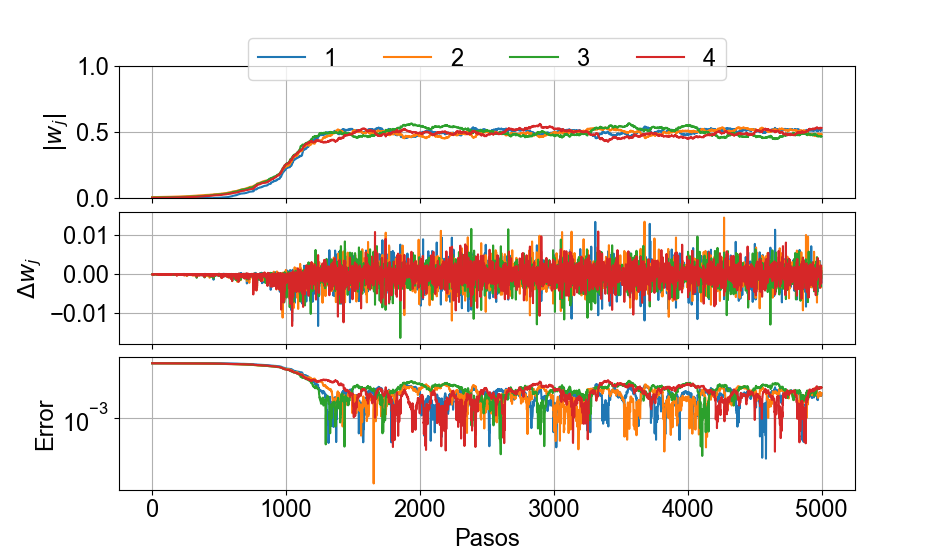

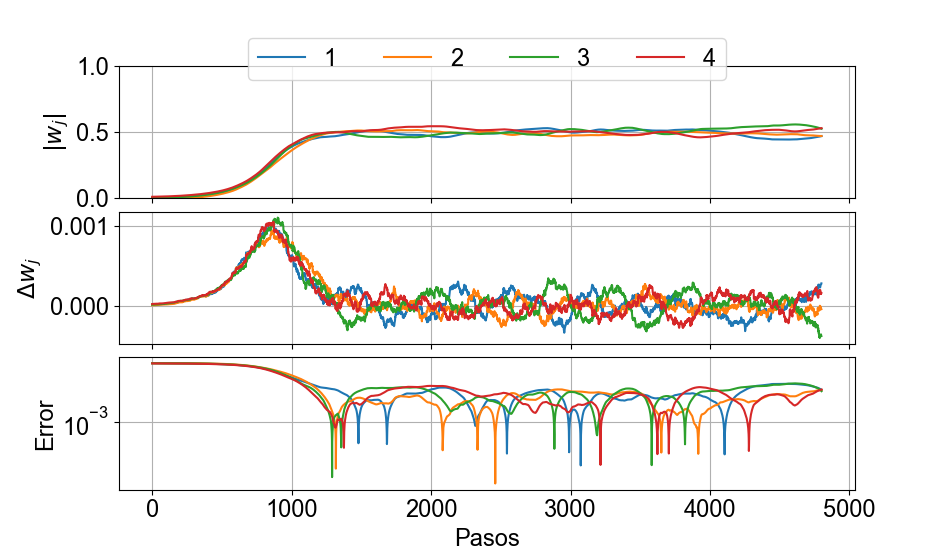

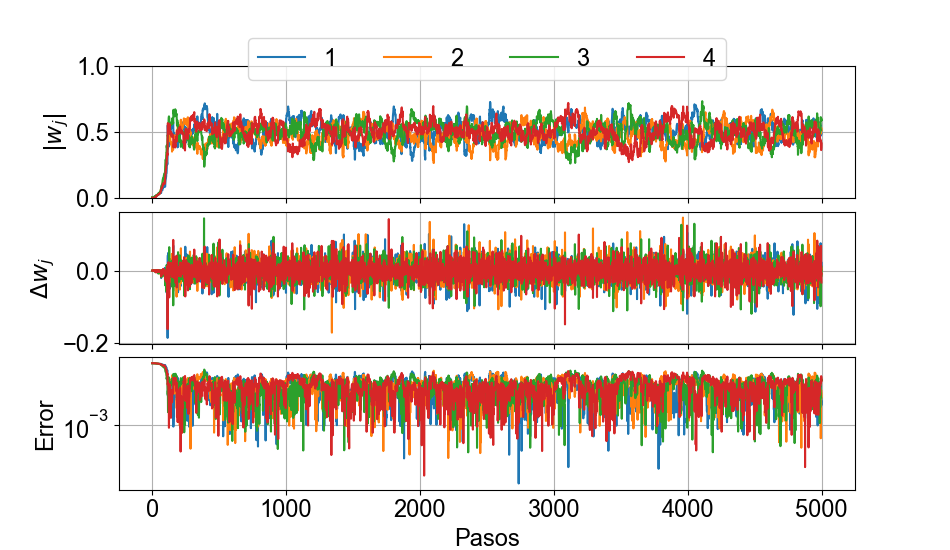

In [26]:
#Hago gráficos para el informe
plt_w(1, 0.001)
plt.savefig('Informe/ej1_fig1.png', bbox_inches='tight', dpi=300)

plt_w(200, 0.001)
plt.savefig('Informe/ej1_fig2.png', bbox_inches='tight', dpi=300)

plt_w(1, 0.01)
plt.savefig('Informe/ej1_fig3.png', bbox_inches='tight', dpi=300)


## Ejercicio 2

In [27]:
#Def parámetros globales
r1 = 0.9
r2 = 1.1
N = 2
M = 10
w_ini_max = 0.1

#Def seed
np.random.seed(0)

In [28]:
#Genero pares de nros aleatorios (x,y) con distribución uniforme sobre un círculo
def generar_datos(n):


    r_array = np.empty([n,2])

    contador = 0
    while(contador < n):
        #Genero nros aleatorios con distribución uniforme entre 0 y 1
        x = (np.random.rand()*2 - 1)*r2
        y = (np.random.rand()*2 - 1)*r2

        #Me fijo si pertenece al anillo
        r = np.sqrt(x**2 + y**2)
        theta = np.arctan2(y,x)

        if r1 < r < r2 and 0 < theta < np.pi:
            r_array[contador] = np.array([x,y])
            contador += 1

    return r_array

# #Genero nros aleatorios
# r_array = generar_datos(10000)

# #Grafico un histograma en 2 dimensiones
# fig = plt.figure()
# ax = fig.add_subplot(111)
# ax.hist2d(r_array[:,0],r_array[:,1],bins=50)
# ax.set_xlim(-1.5,1.5)
# ax.set_ylim(-1.5,1.5)
# ax.set_xlabel('x')
# ax.set_ylabel('y')
# ax.set_title('Histograma en 2D')
# plt.show()


In [29]:
def Vecindad(i,i_star,sigma):

    return np.exp(-((i-i_star)**2)/(2*sigma**2))



def algoritmo_de_Kohonen(w, x, sigma, eta):

    #Calculo la neurona ganadora
    i_star = np.argmin(np.linalg.norm(w-x,axis=1))

    #Actualizo los pesos
    delta_w = eta*Vecindad(np.arange(M),i_star,sigma).reshape(M,1)*(x-w)
    w += delta_w

    return w


In [30]:
def entrenamiento_Kohonen(N_train, sigma, eta):

    #Inicializo pesos de la red
    w = np.random.rand(M,N)*w_ini_max
    w_matriz = np.empty([N_train,M,N])

    #Genero los datos
    r_array = generar_datos(N_train)

    #Entreno la red
    for i in range(N_train):
        w = algoritmo_de_Kohonen(w, r_array[i], sigma, eta)
        #Guardo el valor
        w_matriz[i] = w

    return w_matriz



In [31]:
#Entreno la red
N_train = 100
sigma = 0.5
eta = 0.1

w_matriz = entrenamiento_Kohonen(N_train, sigma, eta)


(-0.5, 1.5)

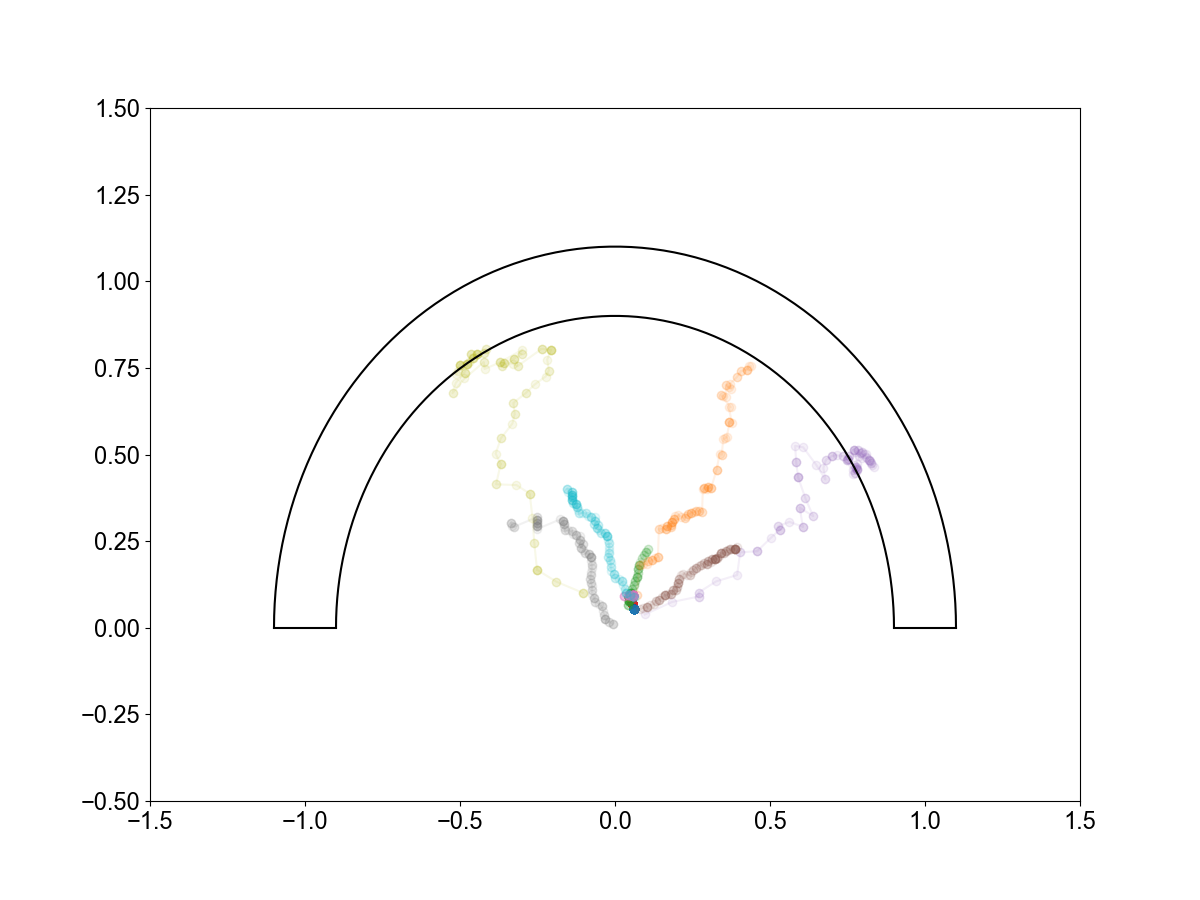

In [32]:
#Graph los pesos en el tiempo
fig, ax = plt.subplots(figsize = (12,9))

#Grafico los pesos
color_vec = ["tab:red", "tab:blue", "tab:green", "tab:orange", "tab:purple", "tab:brown", "tab:pink", "tab:gray", "tab:olive", "tab:cyan"]

#Grafico los pesos
for i in range(M):
    ax.plot(w_matriz[:,i,0],w_matriz[:,i,1],'o-',color=color_vec[i],alpha=0.1)
    #Agrego un nro a cada neurona
    # ax.text(w_matriz[t,i,0],w_matriz[t,i,1],str(i),color=color_vec[i],alpha=0.5)

#Grafico un anillo entre r1 y r2 con theta entre 0 y pi
theta = np.linspace(0,np.pi,100)
ax.plot(r1*np.cos(theta),r1*np.sin(theta),'k')
ax.plot(r2*np.cos(theta),r2*np.sin(theta),'k')
ax.plot([-r2,-r1],[0,0],'k'); ax.plot([r1,r2],[0,0],'k')

ax.set_xlim(-1.5,1.5)
ax.set_ylim(-0.5,1.5)


In [33]:
def plt_entrenamiento_Kohonen(N_train, sigma, eta):
    #Redef seed
    np.random.seed(0)


    w_matriz = entrenamiento_Kohonen(N_train, sigma, eta)

    #Graph los pesos en el tiempo
    fig, ax = plt.subplots(figsize = (5,4))

    color_vec = ["tab:red", "tab:blue", "tab:green", "tab:orange", "tab:purple", "tab:brown", "tab:pink", "tab:gray", "tab:olive", "tab:cyan"]

    #Grafico los pesos
    for i in range(M):
        ax.plot(w_matriz[0:,i,0],w_matriz[0:,i,1],'o-',color=color_vec[i], alpha = 0.1)
    for i in range(M):
        #Pinto de otro color el último punto
        ax.plot(w_matriz[-1,i,0],w_matriz[-1,i,1],'o-',color="k", alpha = 1)
        ax.text(w_matriz[-1,i,0],w_matriz[-1,i,1],str(i),color="k",alpha=1)


    #Grafico un anillo entre r1 y r2 con theta entre 0 y pi
    theta = np.linspace(0,np.pi,100)
    ax.plot(r1*np.cos(theta),r1*np.sin(theta),'k')
    ax.plot(r2*np.cos(theta),r2*np.sin(theta),'k')
    ax.plot([-r2,-r1],[0,0],'k'); ax.plot([r1,r2],[0,0],'k')

    ax.set_xlim(-1.2,1.2)
    ax.set_ylim(-0.1,1.2)

    #Quito los tickslabels
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.set_xticks([])
    ax.set_yticks([])
    
    #Agrego arriba a la izquierda el valor de N_train
    ax.text(-1.1,1.05,'$\mathrm{N_{train}}$ = '+str(N_train),color="k",alpha=1)


    plt.show()

    return

#Hago un slider para variar N_train, sigma y eta
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

interact(plt_entrenamiento_Kohonen, N_train=widgets.IntSlider(min=10, max=20000, step=10, value=100), sigma=widgets.FloatSlider(min=0.1, max=10, step=0.1, value=0.5), eta=widgets.FloatSlider(min=0.01, max=1, step=0.01, value=0.1), ind_ini=widgets.IntSlider(min=-1, max=0, step=1, value=0))

interactive(children=(IntSlider(value=100, description='N_train', max=20000, min=10, step=10), FloatSlider(val…

<function __main__.plt_entrenamiento_Kohonen(N_train, sigma, eta)>

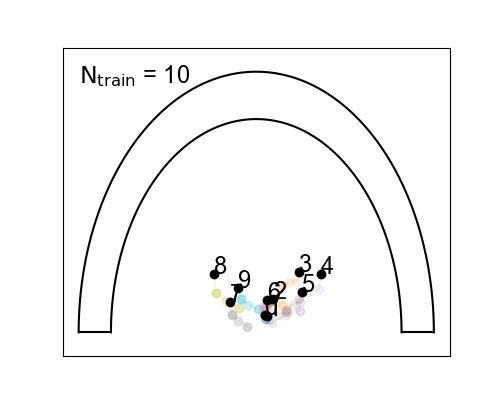

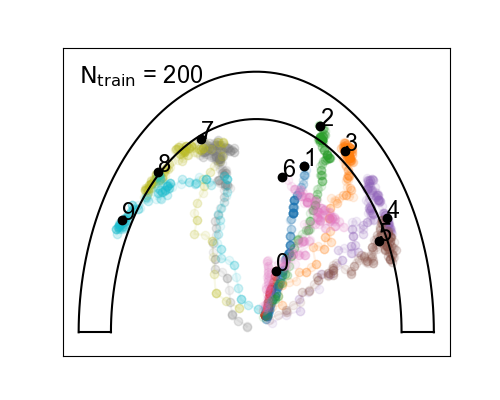

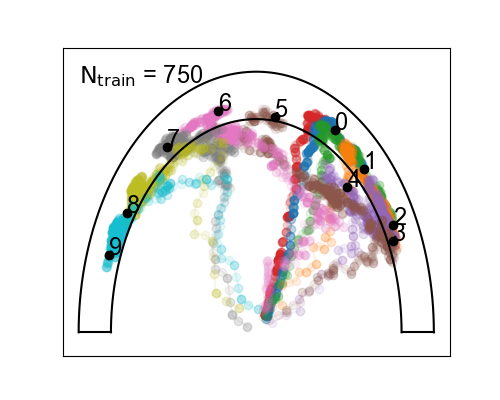

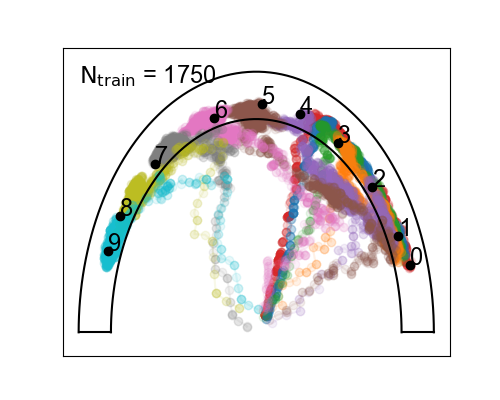

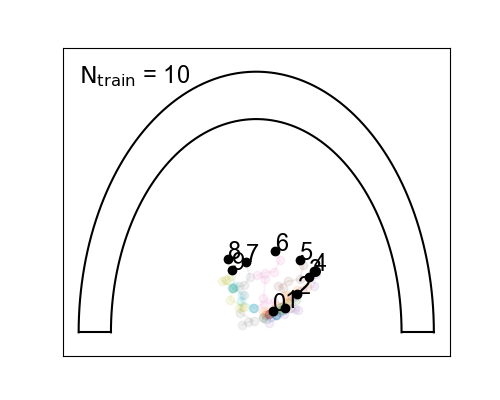

C:\Users\lupam\AppData\Local\Temp\ipykernel_11924\1988648165.py:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(figsize = (5,4))


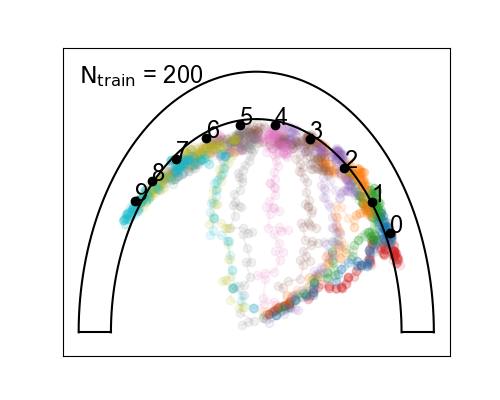

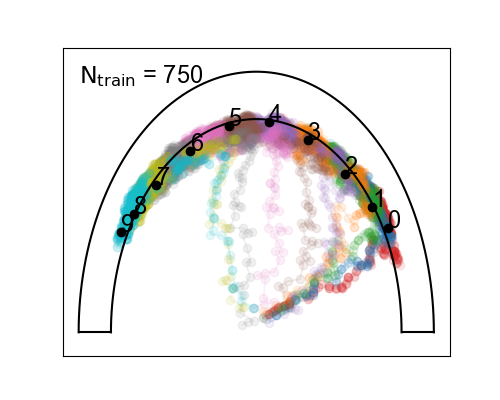

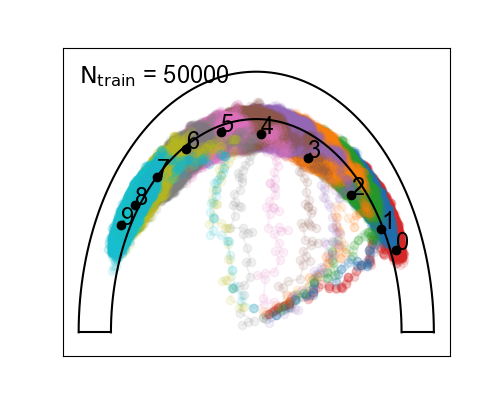

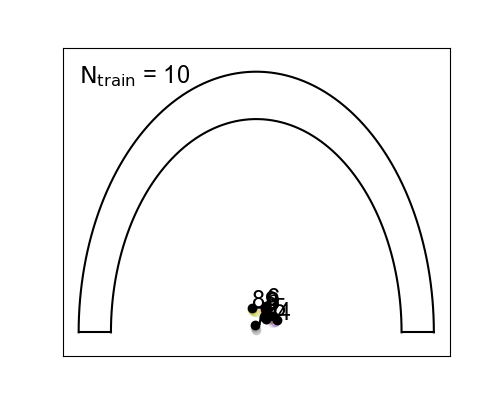

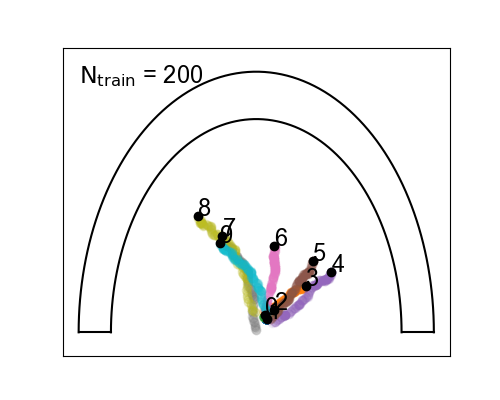

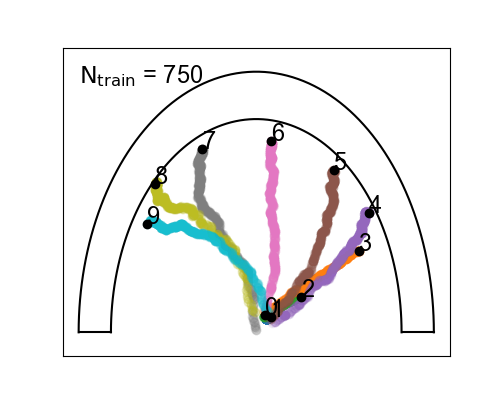

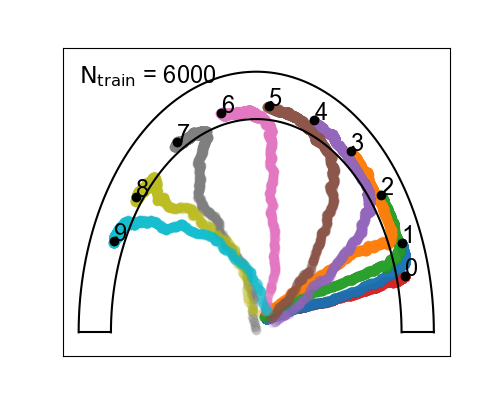

In [34]:
#Guardo gráficos particulares y los guardo
# plt_entrenamiento_Kohonen(N_train, sigma, eta)

#Figura 1
sigma = 1
eta = 0.1

plt_entrenamiento_Kohonen(10, sigma, eta)
plt.savefig('Informe/ej2_fig1_1.png', bbox_inches='tight', dpi=300)

plt_entrenamiento_Kohonen(200, sigma, eta)
plt.savefig('Informe/ej2_fig1_2.png', bbox_inches='tight', dpi=300)

plt_entrenamiento_Kohonen(750, sigma, eta)
plt.savefig('Informe/ej2_fig1_3.png', bbox_inches='tight', dpi=300)

plt_entrenamiento_Kohonen(1750, sigma, eta)
plt.savefig('Informe/ej2_fig1_4.png', bbox_inches='tight', dpi=300)

#Figura 2
sigma = 2
eta = 0.1

plt_entrenamiento_Kohonen(10, sigma, eta)
plt.savefig('Informe/ej2_fig2_1.png', bbox_inches='tight', dpi=300)

plt_entrenamiento_Kohonen(200, sigma, eta)
plt.savefig('Informe/ej2_fig2_2.png', bbox_inches='tight', dpi=300)

plt_entrenamiento_Kohonen(750, sigma, eta)
plt.savefig('Informe/ej2_fig2_3.png', bbox_inches='tight', dpi=300)

plt_entrenamiento_Kohonen(50000, sigma, eta)
plt.savefig('Informe/ej2_fig2_4.png', bbox_inches='tight', dpi=300)

#Figura 3
sigma = 1
eta = 0.01

plt_entrenamiento_Kohonen(10, sigma, eta)
plt.savefig('Informe/ej2_fig3_1.png', bbox_inches='tight', dpi=300)

plt_entrenamiento_Kohonen(200, sigma, eta)
plt.savefig('Informe/ej2_fig3_2.png', bbox_inches='tight', dpi=300)

plt_entrenamiento_Kohonen(750, sigma, eta)
plt.savefig('Informe/ej2_fig3_3.png', bbox_inches='tight', dpi=300)

plt_entrenamiento_Kohonen(6000, sigma, eta)
plt.savefig('Informe/ej2_fig3_4.png', bbox_inches='tight', dpi=300)

